In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# PredefinedSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
# loadings saved features that was prepared in data preparation file

from pickle import load
# load train_diagnose
train_diagnose= load(open('train_diagnose.pkl', 'rb'))
# load the fa_feature_all_locations_without_Nan data
fa_feature_all_locations_without_Nan = load(open('fa_feature_all_locations_without_Nan.pkl', 'rb'))
# load the md_feature_all_locations_without_Nan data
md_feature_all_locations_without_Nan= load(open('md_feature_all_locations_without_Nan.pkl', 'rb'))

# load the rd_feature_all_locations_without_Nan data
rd_feature_all_locations_without_Nan= load(open('rd_feature_all_locations_without_Nan.pkl', 'rb'))
# load the ad_feature_all_locations_without_Nan data
ad_feature_all_locations_without_Nan= load(open('ad_feature_all_locations_without_Nan.pkl', 'rb'))

cl_feature_all_locations_without_Nan= load(open('cl_feature_all_locations_without_Nan.pkl', 'rb'))
# load curvature_feature_all_locations_without_Nan data
curvature_feature_all_locations_without_Nan= load(open('curvature_feature_all_locations_without_Nan.pkl', 'rb'))

# load the Torision data
Torsion_feature_all_locations_without_Nan = load(open('Torsion_feature_all_locations_without_Nan.pkl', 'rb'))
# load the volume data
volume_feature_all_locations_without_Nan= load(open('volume_feature_all_locations_without_Nan.pkl', 'rb'))


In [3]:
# correcting mistakes of not using replaced nan values 
combined_features_without_Scaling=np.concatenate((fa_feature_all_locations_without_Nan,md_feature_all_locations_without_Nan,rd_feature_all_locations_without_Nan, 
                        ad_feature_all_locations_without_Nan,cl_feature_all_locations_without_Nan,curvature_feature_all_locations_without_Nan,
                        Torsion_feature_all_locations_without_Nan,volume_feature_all_locations_without_Nan),axis=1)


In [4]:
# combining Features and train diagnose 
CombinedFeatDig=np.concatenate((combined_features_without_Scaling,train_diagnose),axis=1)

In [5]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [6]:
# Creating x and Y for each classes
NC_data_x = CombinedFeatDig[:,0:16000][NC]
NC_data_y = CombinedFeatDig[:,-1][NC]
print("-"*60)
print("Normal Control shape:",NC_data_x.shape)
print("Normal Control lable shape:",NC_data_y.shape)


NMCI_data_x =CombinedFeatDig[:,0:16000][NMCI]
NMCI_data_y = CombinedFeatDig[:,-1][NMCI]
print("-"*60)
print("NMCI shape:",NMCI_data_x.shape)
print("NMCI Y label:",NMCI_data_y.shape)

AD_data_x = CombinedFeatDig[:,0:16000][AD]
AD_data_y = CombinedFeatDig[:,-1][AD]
print("-"*60)
print("Alzheimer Disease shape :",AD_data_x.shape)
print("Alzheimer Disease Y label shape :",AD_data_y.shape)


------------------------------------------------------------
Normal Control shape: (235, 16000)
Normal Control lable shape: (235,)
------------------------------------------------------------
NMCI shape: (215, 16000)
NMCI Y label: (215,)
------------------------------------------------------------
Alzheimer Disease shape : (250, 16000)
Alzheimer Disease Y label shape : (250,)


#   Normal Control vs MCI 

In [8]:
# In order to perofm classification on NC and MCI these two data set are concatenated.
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 16000)
(450,)


In [9]:
where_1 = np.where(NCvsNMCI_Y== 1)
where_2 = np.where(NCvsNMCI_Y== 2)

# Assigning 0 to NCC and 1 to MCI .
NCvsNMCI_Y[where_1] = 0
NCvsNMCI_Y[where_2] = 1
NCvsNMCI_Y.shape

(450,)

In [10]:
from sklearn.model_selection import train_test_split
# splitting the above data into training,testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X, NCvsNMCI_Y, test_size=0.20, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=123)

In [11]:
# looking at the shape of each sets.
print("Training Set shape:",X_train.shape)
print("Validation Set shape:",X_val.shape)
print("Test Set shape:",X_test.shape)


Training Set shape: (324, 16000)
Validation Set shape: (36, 16000)
Test Set shape: (90, 16000)


In [12]:
# peefoming MinMAx sacaler so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_val)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
scaler.fit(X_test)
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)

Alzheimer's diseas and Normal Train shape : (324, 16000)
Alzheimer's diseas and Normal Validation shape : (36, 16000)
Alzheimer's diseas and Normal Test shape : (90, 16000)


In [13]:

# intializing clasisfiers into teh classifier list.
classifiers = [
    SVC(random_state=25,probability=True),
    DecisionTreeClassifier(random_state=25),
    RandomForestClassifier(random_state=25),
    XGBClassifier(random_state=25),
    ]

# looking at teh tarning and validations core of four models before applying PCA
models_cols=["Classifiers", "Accuracy","F1_score_NM", "F1_score_NMCI"]
models_df = pd.DataFrame(columns=models_cols)

for models in classifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NM: {:.2%}".format(f1_scores1))
    print("F1_Score of NMCI: {:.2%}".format(f1_scores2))
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)


SVC
****Results****
Training 87.96%
Accuracy 47.78%
F1_Score of NM: 4.08%
F1_Score of NMCI: 64.12%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 41.11%
F1_Score of NM: 29.33%
F1_Score of NMCI: 49.52%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 51.11%
F1_Score of NM: 33.33%
F1_Score of NMCI: 61.40%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 56.67%
F1_Score of NM: 63.55%
F1_Score of NMCI: 46.58%


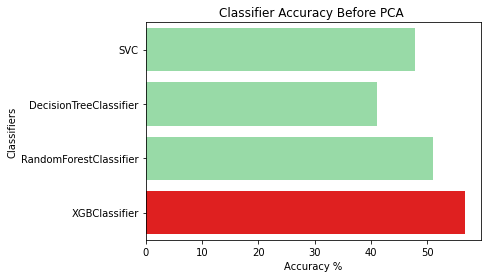

In [14]:
def set_custom_palette(series, max_color = 'crimson', other_color = 'b'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal
sns.set_color_codes("pastel")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'red', other_color = 'g')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="g",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy Before PCA ')
plt.show()

In [15]:
from math import sqrt
pca=PCA(150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
var_exp = pca.explained_variance_ratio_
X_val_pca=pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print("Total variance explianed by 250 components:", var_exp.sum())
print("std of test set AFTER PCA: ", np.std(X_test_pca))
print("mean of test set AFTER PCA: ",np.mean(X_test_pca))
print("std of training set AFTER PCA: ", np.std(X_train_pca))
print("mean of training set AFTER PCA: ",np.mean(X_train_pca))
print("std of test set BEFORE PCA:: ", np.std(X_test))
print("mean of test set BEFORE PCA: ",np.mean(X_test))
print("std of training set BEFORE PCA:: ", np.std(X_test))
print("mean of training set BEFORE PCA: ",np.mean(X_test))


Total variance explianed by 250 components: 0.8705085284756486
std of test set AFTER PCA:  2.3450039711831727
mean of test set AFTER PCA:  0.006813771643647773
std of training set AFTER PCA:  1.394124861666186
mean of training set AFTER PCA:  -2.6901206456760994e-17
std of test set BEFORE PCA::  0.3874429708155599
mean of test set BEFORE PCA:  0.43010262737748417
std of training set BEFORE PCA::  0.3874429708155599
mean of training set BEFORE PCA:  0.43010262737748417


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler = MinMaxScaler()
scaler.fit(X_train_pca)
X_train_pca=scaler.transform(X_train_pca)
scaler.fit(X_val_pca)
X_val_pca=scaler.transform(X_val_pca)
X_test_pca=scaler.transform(X_test_pca)
scaler.fit(X_test_pca)
# print("Alzheimer's diseas and Normal Train shape :",X_train_pca.shape)
# print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
# print("Alzheimer's diseas and Normal Test shape :",X_test.shape)
print("Std of test set : ", np.std(X_test_pca))
print("Mean of test set: ",np.mean(X_test_pca))
print("Std of training set : ", np.std(X_train_pca))
print("Mean of training set: ",np.mean(X_train_pca))

Std of test set :  0.42201471494038467
Mean of test set:  0.485969662643901
Std of training set :  0.16720530296723374
Mean of training set:  0.45639537605018526


In [17]:
# comparing the perfrmance of the models after perfroming PCA.

models_cols=["Classifiers", "Accuracy","F1_score_NM", "F1_score_NMCI","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)

for models in classifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of MCI: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)


SVC
****Results****
Training 97.53%
Accuracy 55.56%
F1_Score of NC: 33.33%
F1_Score of MCI: 66.67%
Sensitivity Score: 90.91%
Specificity Score: 21.74%
AUC Score: 61.14%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 50.00%
F1_Score of NC: 51.61%
F1_Score of MCI: 48.28%
Sensitivity Score: 47.73%
Specificity Score: 52.17%
AUC Score: 49.95%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 50.00%
F1_Score of NC: 44.44%
F1_Score of MCI: 54.55%
Sensitivity Score: 61.36%
Specificity Score: 39.13%
AUC Score: 53.85%
[23:33:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 54.44%
F1_Score of NC: 56.84%
F1_Score of MCI: 51.76%
Sensitivity Score: 50.00%
Specificity Score: 58.70%
AUC Score: 52.92%


Text(0.5, 1.0, 'AUC score of AD vs Normal Control AFTER PCA of NC vs MCI.')

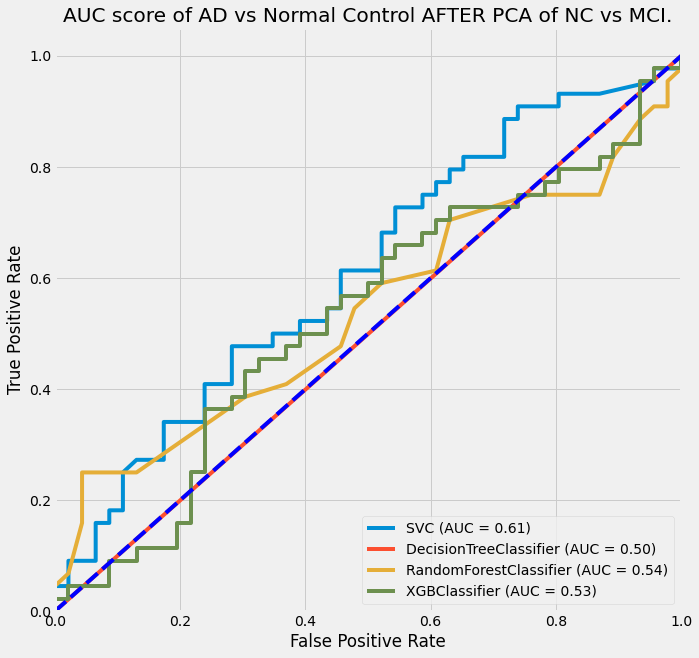

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control AFTER PCA of NC vs MCI.')

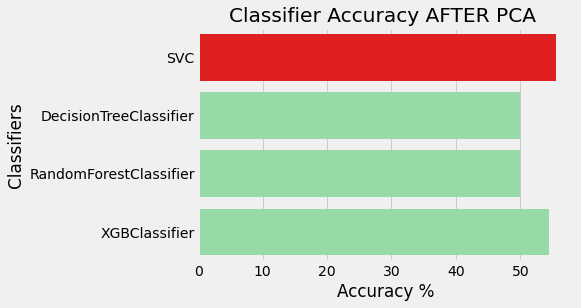

In [19]:
# plotting the above results.
sns.set_color_codes("pastel")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'red', other_color = 'g')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="g",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy AFTER PCA ')
plt.show()

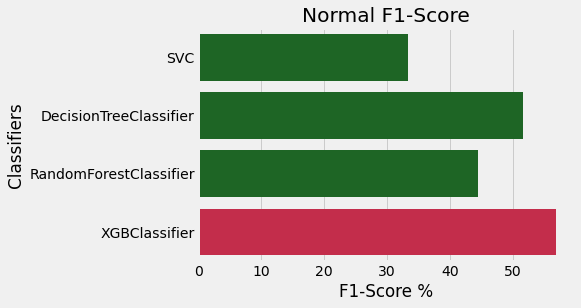

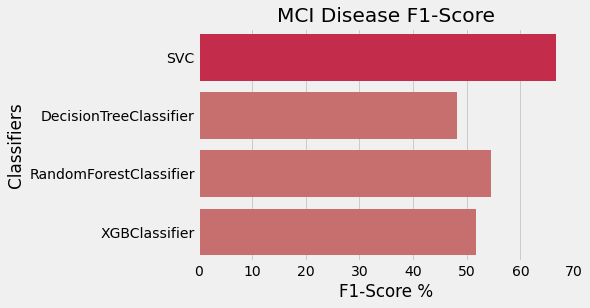

In [20]:
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NM'],other_color = 'g')
sns.barplot(x='F1_score_NM', y='Classifiers', data=models_df,palette=clrs, color="g")

plt.xlabel('F1-Score %')
plt.title('Normal F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_NMCI'],other_color = 'r')
sns.barplot(x='F1_score_NMCI', y='Classifiers', data=models_df,palette=clrs, color="r")

plt.xlabel('F1-Score %')
plt.title('MCI Disease F1-Score')
plt.show()

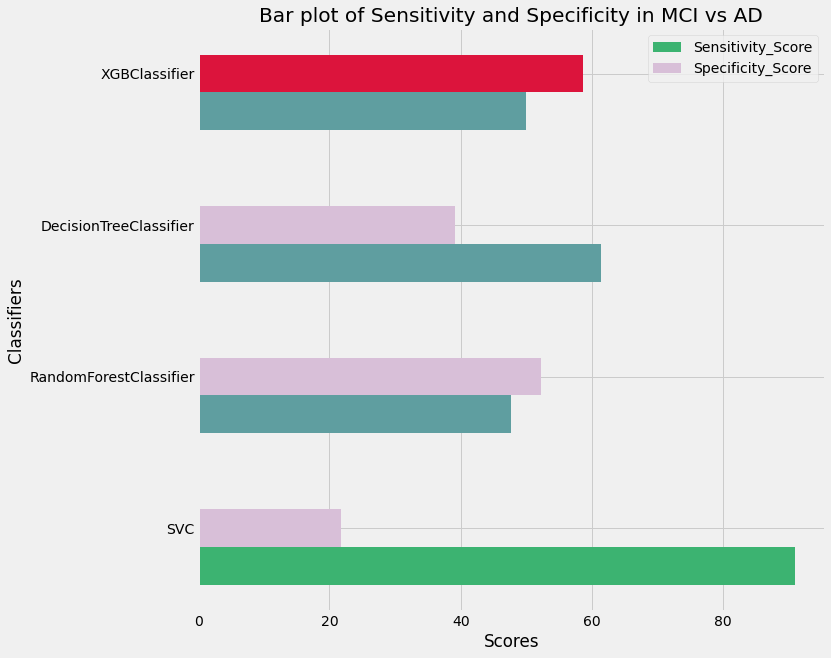

In [21]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = models_df["Sensitivity_Score"]
speci = models_df["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'crimson' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in MCI vs AD")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# Normal Control vs NMCI HYPERPARAMTER TUNNING


## SVM HYPERPARAMTER TUNNING

In [22]:
%%time


# SVm hyperparameter tunning by trying difefrent values.
cross_valid_scores = {}
best_estimator_Score={}
parameters = {
    "C": [0.001, 0.01, 0.1,1,1.5 ,2, 2.4,3,4],
    "kernel": ["linear", "poly", "sigmoid","rbf"],
    "gamma": ["scale", "auto"],
     "class_weight":["balanced",None],
    "probability":[True,False]
}
# parameters = {
#     "C": [0.001, 0.01, 0.1,1,1.5 2, 2.4,3,4],
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "gamma": ["scale", "auto"],
# }

model_svc = SVC(
    random_state=25,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_svc.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_svc.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_svc.best_estimator_.score(X_val_pca, y_val)
print('-----')

-----
Best parameters {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
Mean cross-validated accuracy score of the best_estimator: 0.593
Best estimator score on Validation set : 0.556
-----
CPU times: user 1min 2s, sys: 221 ms, total: 1min 2s
Wall time: 1min 2s


## Desicion Tree HYPERPARAMTER TUNNING

In [23]:
%%time
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
                      
}


model_desicion_tree = DecisionTreeClassifier(
    random_state=25
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_

# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_desicion_tree.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_desicion_tree.best_estimator_.score(X_val_pca, y_val)

print('-----')

-----
Best parameters {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.565
Best estimator score on Validation set : 0.583
-----
CPU times: user 2min 7s, sys: 377 ms, total: 2min 7s
Wall time: 2min 8s


#  Random Forest HYPERPARAMTERER TUNNING

In [24]:
%%time


parameters = {
    "criterion":["gini","entropy"],
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_features":range(5,11),
    "bootstrap":[True,False],
    "class_weight":["balanced",None],
    "max_depth": [3, 5, 7, 9, 11, 13,None],
    
}



model_random_forest = RandomForestClassifier(
    random_state=25,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_random_forest.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_random_forest.best_estimator_.score(X_val_pca, y_val)

print('-----')


-----
Best parameters {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'n_estimators': 20}
Mean cross-validated accuracy score of the best_estimator: 0.636
Best estimator score on Validation set : 0.611
-----
CPU times: user 4min 51s, sys: 2.91 s, total: 4min 54s
Wall time: 4min 56s


#  XGBOOST HYPERPARAMETER TUNNING

In [25]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'verbosity': [0]
}

model_xgb = XGBClassifier(
    random_state=25,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
     # add this line to slient warning message
)

model_xgb.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_xgb.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_xgb.best_estimator_.score(X_val_pca, y_val)

print('-----')


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----
Best parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'verbosity': 0}
Mean cross-validated accuracy score of the best_estimator: 0.593
Best estimator score on Validation set : 0.611
-----
CPU times: user 4min 7s, sys: 4.58 s, total: 4min 11s
Wall time: 35.9 s


In [26]:
pd.DataFrame(cross_valid_scores, index=['Best Accuracy Through Grid Search']).T

,Best Accuracy Through Grid Search
svc,0.592644
desicion_tree,0.564760
random_forest,0.635673
xgboost,0.592548


## Applying Best Paramaters for each models after Hyper Paramater tunning.

In [27]:
# combining Training and validation set which makes training set 80% and  test set 20%
X_train_pca=np.concatenate((X_val_pca, X_train_pca), axis=0)
y_train=np.concatenate((y_val, y_train), axis=0)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)

(360, 150)
(360,)
(90, 150)


In [28]:
# Applying Best Paramaters for each models after Hyper Paramater tunning

# applying the ebst aprameters of hyper_parameter tunning into four classifiers of sVM, decision tree and random Forest
svc_final = SVC(**model_svc.best_params_)

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(
            **model_random_forest.best_params_,random_state=25
)


# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_,random_state=25
)

# Applying best params to final xgboost
xgb_final = XGBClassifier(
        **model_xgb.best_params_,random_state=25)


# saving teh mdoel to be used for feature importance
from pickle import dump
# save the svc model
dump(svc_final, open('svc_final_NCvsMCI_withVal.pkl', 'wb'))
# save the  randomforest
dump(rf_final, open('rf_final_NCvsMCI_withVal.pkl', 'wb'))

# save the dt model
dump(dt_final, open('dt_final_NCvsMCI_withVal.pkl', 'wb'))
# save the axgboost model
dump(xgb_final, open('xgb_final_NCvsMCI_withVal.pkl', 'wb'))





In [29]:
# comapring the metrics after trying the best parameters for each classifiers.

finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
final_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_NMCI","Sensitivity_Score","Specificity_Score","AUC"]
final = pd.DataFrame(columns=final_cols)

for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
    
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)
  
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of MCI: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=final_cols)
    final = final.append(final_entry )
print("="*30)

SVC
****Results****
Training 100.00%
Accuracy 51.11%
F1_Score of NC: 46.34%
F1_Score of MCI: 55.10%
Sensitivity Score: 61.36%
Specificity Score: 41.30%
AUC Score: 52.72%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 55.56%
F1_Score of NC: 48.72%
F1_Score of MCI: 60.78%
Sensitivity Score: 70.45%
Specificity Score: 41.30%
AUC Score: 58.84%
DecisionTreeClassifier
****Results****
Training 67.78%
Accuracy 58.89%
F1_Score of NC: 66.67%
F1_Score of MCI: 46.38%
Sensitivity Score: 36.36%
Specificity Score: 80.43%
AUC Score: 60.52%
XGBClassifier
****Results****
Training 99.72%
Accuracy 62.22%
F1_Score of NC: 59.52%
F1_Score of MCI: 64.58%
Sensitivity Score: 70.45%
Specificity Score: 54.35%
AUC Score: 62.60%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
final

,Classifier,Accuracy,F1_score_NC,F1_score_NMCI,Sensitivity_Score,Specificity_Score,AUC
0,SVC,51.111111,46.341463,55.102041,61.363636,41.304348,52.717391
0,RandomForestClassifier,55.555556,48.717949,60.784314,70.454545,41.304348,58.843874
0,DecisionTreeClassifier,58.888889,66.666667,46.376812,36.363636,80.434783,60.523715
0,XGBClassifier,62.222222,59.523810,64.583333,70.454545,54.347826,62.598814


In [31]:
models_df


,Classifiers,Accuracy,F1_score_NM,F1_score_NMCI,Sensitivity_Score,Specificity_Score,AUC
0,SVC,55.555556,33.333333,66.666667,90.909091,21.739130,61.141304
0,DecisionTreeClassifier,50.000000,51.612903,48.275862,47.727273,52.173913,49.950593
0,RandomForestClassifier,50.000000,44.444444,54.545455,61.363636,39.130435,53.853755
0,XGBClassifier,54.444444,56.842105,51.764706,50.000000,58.695652,52.915020


Text(0.5, 1.0, 'AUC score of Normal Control vs MCI "AFTER" Hyper-Parameter Tunning.')

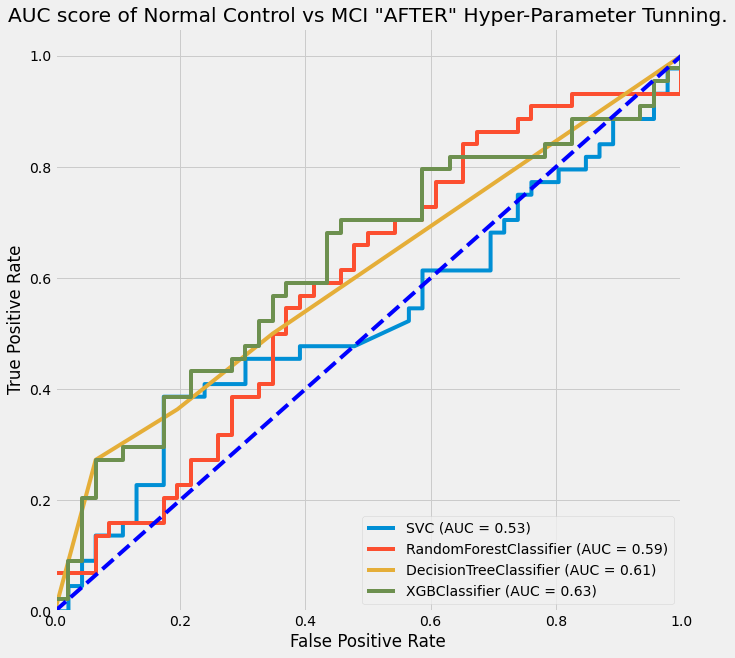

In [32]:
# plotting AUC curvee 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in finalClassifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of Normal Control vs MCI "AFTER" Hyper-Parameter Tunning.')



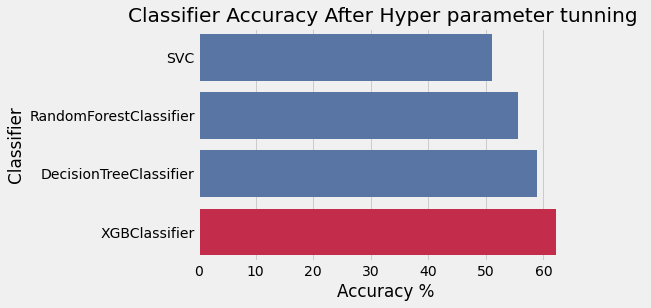

In [33]:

# plotting the accuarcy score of different models

sns.set_color_codes("deep")
clrs=set_custom_palette(final['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifier', data=final, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy After Hyper parameter tunning ')
plt.show()



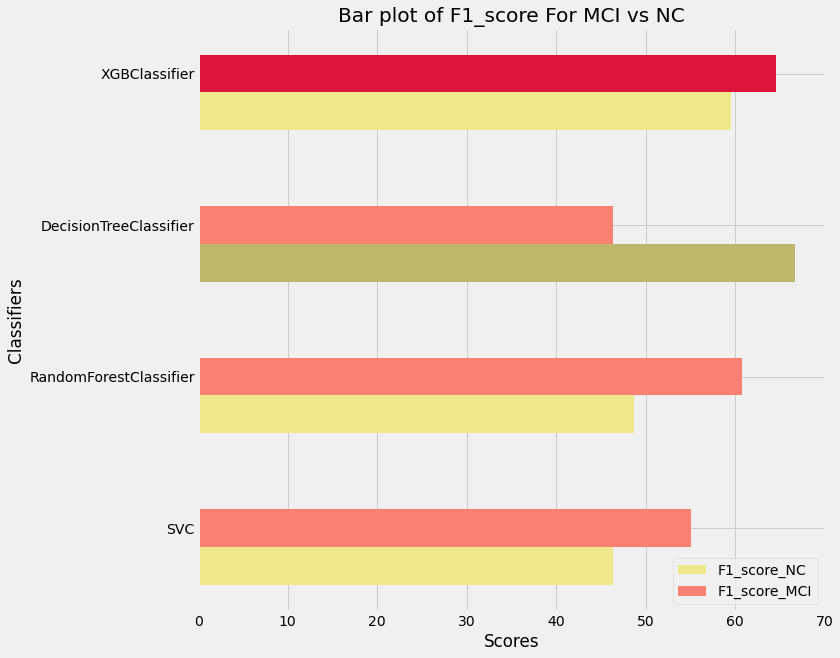

In [34]:

# plotting the f1_Scores for each classifiers 
plt.figure(figsize=[10, 10])
# Data to be plotted
f1_nc = final["F1_score_NC"]
f1_mci = final["F1_score_NMCI"]

# Using numpy to group 3 different data with bars
X = np.arange(len(f1_nc))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
# changing color to dark khaki if it has highest value for f-score-nc
clrs = ["khaki" if (x < max(f1_nc)) else 'darkkhaki' for x in f1_nc ]
plt.barh(X, f1_nc, color = clrs, height = 0.25)
# changing color to dark salmon if it has highest value for f-score-ad
clrs = ["salmon" if (x < max(f1_mci)) else 'crimson' for x in f1_mci]
plt.barh(X + 0.25, f1_mci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['F1_score_NC', 'F1_score_MCI'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of F1_score For MCI vs NC")
# Namimg the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
plt.show()

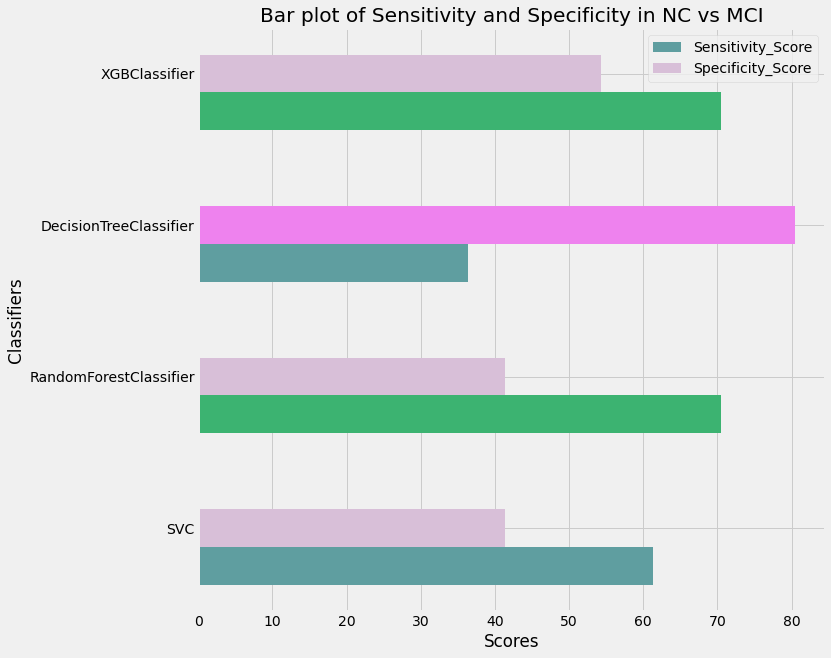

In [35]:
# plotting the sensivity and specificity of different classifiers
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = final["Sensitivity_Score"]
speci = final["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'violet' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in NC vs MCI")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# AD Vs MCI 

In [36]:
# concatenating Ad and MCI to perform classification
ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 16000)
(465,)


In [37]:
# assaigning 1 to MCI and 0 to Ad to classify MCI from AD
where_2 = np.where(ADvsNMCI_Y== 2)
where_3 = np.where(ADvsNMCI_Y== 3)

ADvsNMCI_Y[where_2] = 1
ADvsNMCI_Y[where_3] = 0
ADvsNMCI_Y.shape

(465,)

In [38]:
from sklearn.model_selection import train_test_split
# splitting teh adta into val, test and trainings sets
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X, ADvsNMCI_Y, test_size=0.20, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=123)

print("Training Set shape:",X_train.shape)
print("Validation Set shape:",X_val.shape)
print("Test Set shape:",X_test.shape)

Training Set shape: (334, 16000)
Validation Set shape: (38, 16000)
Test Set shape: (93, 16000)


In [39]:
# using MinMAx scaler so that all features be on the same sclae
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_val)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
scaler.fit(X_test)
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)

Alzheimer's diseas and Normal Train shape : (334, 16000)
Alzheimer's diseas and Normal Validation shape : (38, 16000)
Alzheimer's diseas and Normal Test shape : (93, 16000)


In [40]:
# applying classfiers of svm , decision tree, random froest and XGboost with their default parameters
classifiers = [
    SVC(random_state=25 ,probability=True),
    DecisionTreeClassifier(random_state=25),
    RandomForestClassifier(random_state=25),
    XGBClassifier(random_state=25),
    ]

In [41]:
%%time

models_cols=["Classifiers", "Accuracy","F1_score_NMCI", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)
# creating for loop  models be fitted and metrics computed for each mdoels
for models in classifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of MCI: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
#     saving teh rseult in models_Df data frame.
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)



SVC
****Results****
Training 89.52%
Accuracy 51.61%
F1_Score of MCI: 0.00%
F1_Score of AD: 68.09%
Sensitivity Score: 0.00%
Specificity Score: 100.00%
AUC Score: 70.28%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 46.24%
F1_Score of MCI: 58.33%
F1_Score of AD: 24.24%
Sensitivity Score: 77.78%
Specificity Score: 16.67%
AUC Score: 47.22%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 54.84%
F1_Score of MCI: 56.25%
F1_Score of AD: 53.33%
Sensitivity Score: 60.00%
Specificity Score: 50.00%
AUC Score: 57.85%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of MCI: 64.35%
F1_Score of AD: 42.25%
Sensitivity Score: 82.22%
Specificity Score: 31.25%
AUC Score: 58.89%
CPU times: user 1min 23s, sys: 1.98 s, total: 1min 25s
Wall time: 28 s


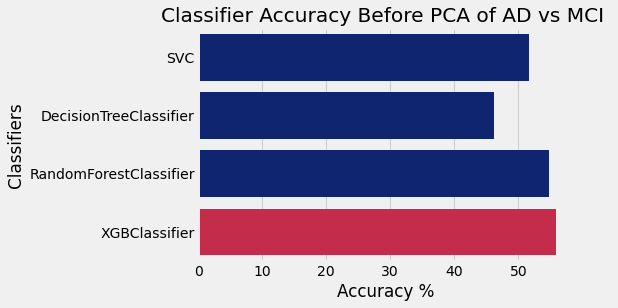

In [42]:


# comapringa accuarcy of each models before applying PCA
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy Before PCA of AD vs MCI ')
plt.show()



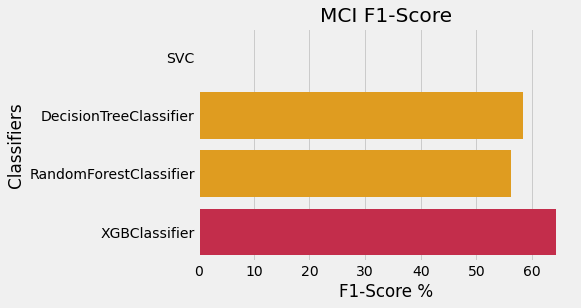

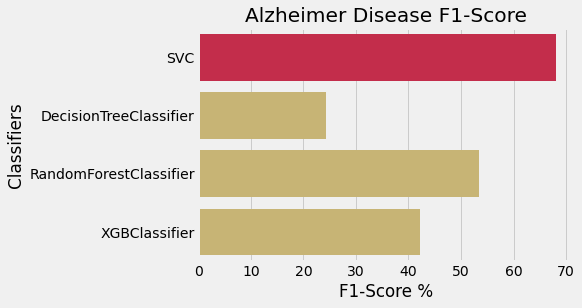

In [43]:

# comapringa f1_Score of each models before applying PCA
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NMCI'],max_color = 'crimson', other_color = 'orange')
sns.barplot(x='F1_score_NMCI', y='Classifiers', data=models_df,palette=clrs, color="orange")

plt.xlabel('F1-Score %')
plt.title('MCI F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],max_color = 'crimson', other_color = 'y')
sns.barplot(x='F1_score_AD', y='Classifiers', data=models_df,palette=clrs, color="y")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()

In [44]:
from math import sqrt
pca=PCA(150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
var_exp = pca.explained_variance_ratio_
X_val_pca=pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print("Total variance explianed by 250 components:", var_exp.sum())
print("std of test set AFTER PCA: ", np.std(X_test_pca))
print("mean of test set AFTER PCA: ",np.mean(X_test_pca))
print("std of training set AFTER PCA: ", np.std(X_train_pca))
print("mean of training set AFTER PCA: ",np.mean(X_train_pca))
print("std of test set BEFORE PCA:: ", np.std(X_test))
print("mean of test set BEFORE PCA: ",np.mean(X_test))
print("std of training set BEFORE PCA:: ", np.std(X_test))
print("mean of training set BEFORE PCA: ",np.mean(X_test))


Total variance explianed by 250 components: 0.8701996954036605
std of test set AFTER PCA:  2.610363214221594
mean of test set AFTER PCA:  0.02758704851149702
std of training set AFTER PCA:  1.3634419845036587
mean of training set AFTER PCA:  -3.4888924749897136e-17
std of test set BEFORE PCA::  0.4075818875940613
mean of test set BEFORE PCA:  0.4280622275796875
std of training set BEFORE PCA::  0.4075818875940613
mean of training set BEFORE PCA:  0.4280622275796875


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# # Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler = MinMaxScaler()
scaler.fit(X_train_pca)
X_train_pca=scaler.transform(X_train_pca)
scaler.fit(X_val_pca)
X_val_pca=scaler.transform(X_val_pca)
X_test_pca=scaler.transform(X_test_pca)
scaler.fit(X_test_pca)
# print("Alzheimer's diseas and Normal Train shape :",X_train_pca.shape)
# print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
# print("Alzheimer's diseas and Normal Test shape :",X_test.shape)
print("Std of test set : ", np.std(X_test_pca))
print("Mean of test set: ",np.mean(X_test_pca))
print("Std of training set : ", np.std(X_train_pca))
print("Mean of training set: ",np.mean(X_train_pca))

Std of test set :  0.47120504171757555
Mean of test set:  0.49775590745252424
Std of training set :  0.16824315466117054
Mean of training set:  0.4621330762448388


In [48]:
%%time
# creating df sao that all result will be saved in data frame and be comapred later on.
models_cols=["Classifiers", "Accuracy","F1_score_NMCI", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)
# creating for loop  models be fitted and metrics computed for each mdoels
for models in classifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of MCI: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
#     saving teh rseult in models_Df data frame.
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)



SVC
****Results****
Training 89.52%
Accuracy 51.61%
F1_Score of MCI: 0.00%
F1_Score of AD: 68.09%
Sensitivity Score: 0.00%
Specificity Score: 100.00%
AUC Score: 70.28%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 46.24%
F1_Score of MCI: 58.33%
F1_Score of AD: 24.24%
Sensitivity Score: 77.78%
Specificity Score: 16.67%
AUC Score: 47.22%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 54.84%
F1_Score of MCI: 56.25%
F1_Score of AD: 53.33%
Sensitivity Score: 60.00%
Specificity Score: 50.00%
AUC Score: 57.85%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of MCI: 64.35%
F1_Score of AD: 42.25%
Sensitivity Score: 82.22%
Specificity Score: 31.25%
AUC Score: 58.89%
CPU times: user 1min 23s, sys: 2.13 s, total: 1min 25s
Wall time: 28.8 s


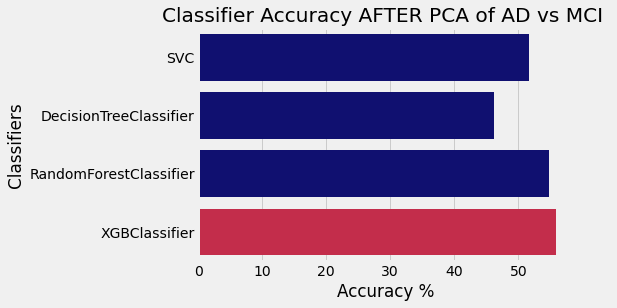

In [49]:
# comparing accuracy of each models after PCA
sns.set_color_codes("pastel")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'crimson', other_color = 'navy')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="navy",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy AFTER PCA of AD vs MCI ')
plt.show()

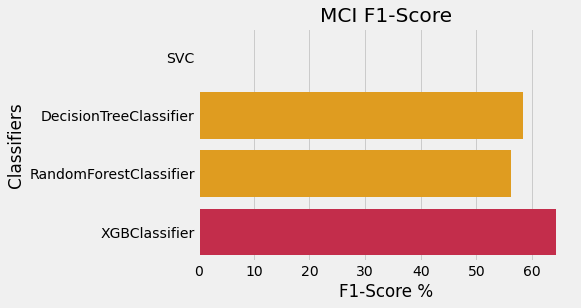

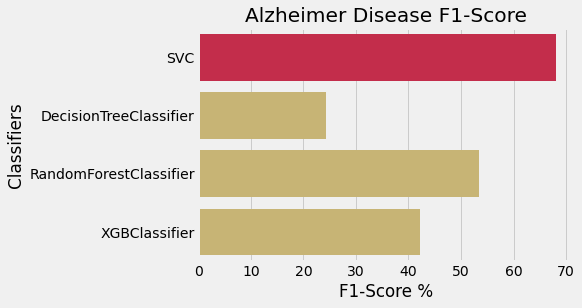

In [50]:
# comapringa f1_Score of each models before applying PCA
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NMCI'],max_color = 'crimson', other_color = 'orange')
sns.barplot(x='F1_score_NMCI', y='Classifiers', data=models_df,palette=clrs, color="orange")

plt.xlabel('F1-Score %')
plt.title('MCI F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],max_color = 'crimson', other_color = 'y')
sns.barplot(x='F1_score_AD', y='Classifiers', data=models_df,palette=clrs, color="y")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()

Text(0.5, 1.0, 'AUC score of AD vs MCI AFTER PCA of AD vs MCI.')

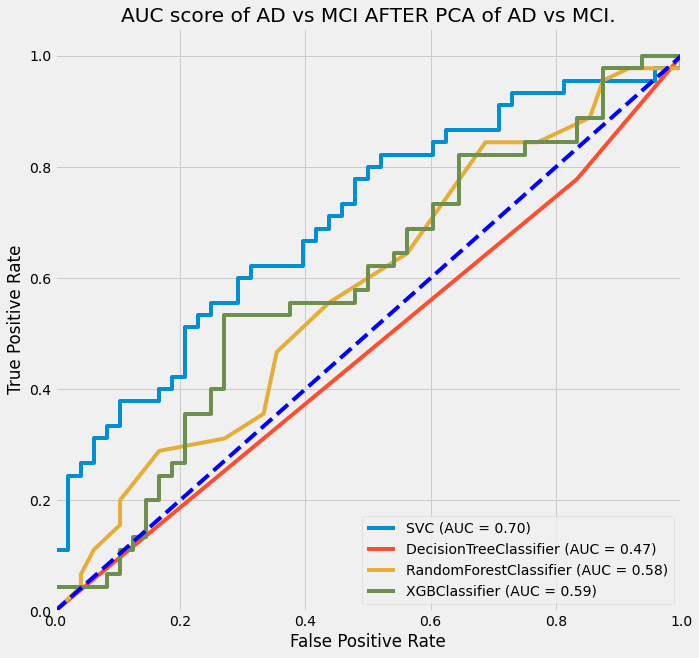

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs MCI AFTER PCA of AD vs MCI.')

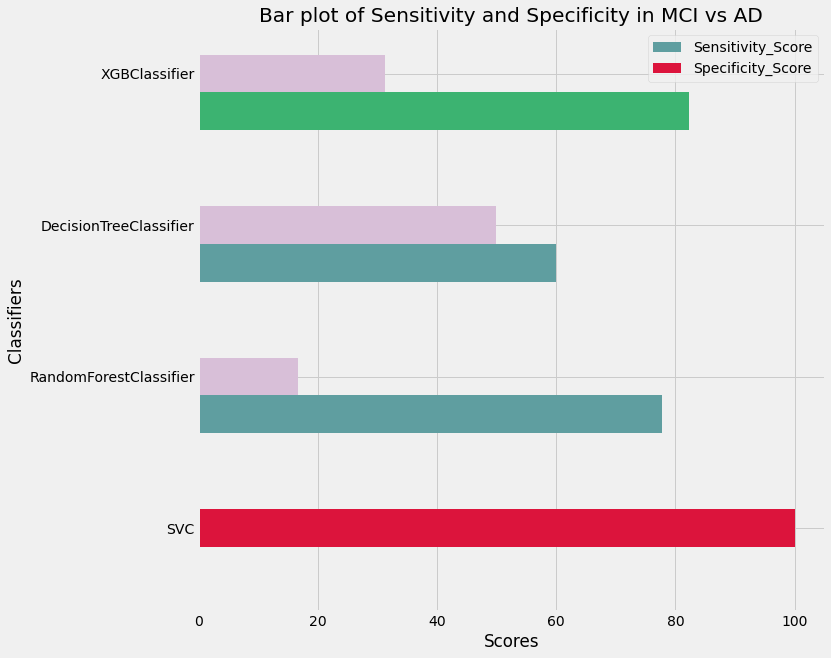

In [52]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = models_df["Sensitivity_Score"]
speci = models_df["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'crimson' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in MCI vs AD")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# AD vs MCI HYPERPARAMTER TUNNING


## SVM HYPERPARAMTER TUNNING

In [53]:
%%time


# HYPERPARAMTER TUNNING svm with diffreent values.
cross_valid_scores = {}
best_estimator_Score={}
parameters = {
    "C": [0.001, 0.01, 0.1, 1.0,1.4,1.5,2.0,2.4,3.0,4],
    "kernel": ["linear", "poly", "sigmoid","rbf"],
    "gamma": ["scale", "auto"],
    "class_weight":["balanced",None],
    "probability":[True,False]
}


model_svc = SVC(
    random_state=25,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_svc.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_


# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_svc.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['SVM Model']=model_svc.best_estimator_.score(X_val_pca, y_val)

print('-----')


-----
Best parameters {'C': 3.0, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Mean cross-validated accuracy score of the best_estimator: 0.650
Best estimator score on Validation set : 0.737
-----
CPU times: user 1min 10s, sys: 171 ms, total: 1min 10s
Wall time: 1min 10s


## Desicion Tree HYPERPARAMTER TUNNING

In [54]:
%%time
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
                      
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=25
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_desicion_tree.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['Desicion_tree']=model_desicion_tree.best_estimator_.score(X_val_pca, y_val)


print('-----')

-----
Best parameters {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.620
Best estimator score on Validation set : 0.526
-----
CPU times: user 1min 53s, sys: 413 ms, total: 1min 53s
Wall time: 1min 53s


#  Random Forest HYPERPARAMTERER TUNNING

In [55]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_features":range(5,11),
    "bootstrap":[True,False],
    "max_depth": [3, 5, 7, 9, 11, 13],
    
}


model_random_forest = RandomForestClassifier(
    random_state=25,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_random_forest.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['Random_Forest']=model_random_forest.best_estimator_.score(X_val_pca, y_val)


print('-----')

-----
Best parameters {'bootstrap': False, 'max_depth': 13, 'max_features': 8, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.638
Best estimator score on Validation set : 0.474
-----
CPU times: user 57.2 s, sys: 524 ms, total: 57.7 s
Wall time: 58 s


#  XGBOOST HYPERPARAMETER TUNNING

In [56]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'verbosity': [0]
}

model_xgb = XGBClassifier(
    random_state=25,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
     # add this line to slient warning message
)

model_xgb.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_xgb.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_xgb.best_estimator_.score(X_val_pca, y_val)

print('-----')

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----
Best parameters {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 25, 'verbosity': 0}
Mean cross-validated accuracy score of the best_estimator: 0.635
Best estimator score on Validation set : 0.500
-----
CPU times: user 4min 29s, sys: 6.02 s, total: 4min 35s
Wall time: 39.3 s


In [57]:
pd.DataFrame(cross_valid_scores, index=['Best Accuracy Through Grid Search ']).T

,Best Accuracy Through Grid Search
svc,0.649525
desicion_tree,0.619946
random_forest,0.637901
xgboost,0.634690


## Applying Best Paramaters for each models after Hyper Paramater tunning.

In [58]:
# combining Training and validation set which makes training set 80% and  test set 20%
X_train_pca=np.concatenate((X_val_pca, X_train_pca), axis=0)
y_train=np.concatenate((y_val, y_train), axis=0)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)

(372, 150)
(372,)
(93, 150)


In [63]:
#  Applying best params to final SVC.
svc_final = classifiers[0]

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(random_state=25)



# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_,random_state=25
)

# Applying best params to final xgboost
xgb_final = XGBClassifier(random_state=25)



# saving teh mdoel to be used for feature importance
from pickle import dump
# save the svc model
dump(svc_final, open('svc_final_ADvsMCI_withVal.pkl', 'wb'))
# save the  randomforest
dump(rf_final, open('rf_final_ADvsMCI_withVal.pkl', 'wb'))

# save the dt model
dump(dt_final, open('dt_final_ADvsMCI_withVal.pkl', 'wb'))
# save the axgboost model
dump(xgb_final, open('xgb_final_ADvsMCI_withVal.pkl', 'wb'))

In [65]:



from sklearn.metrics import f1_score, confusion_matrix
finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
final_cols=["Classifier", "Accuracy","F1_score_NMCI", "F1_score_AD","Sensitivity_Score","Specificity Score","AUC"]
final = pd.DataFrame(columns=final_cols)
for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)
    
  
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
# saving the result into final model data frame.
    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=final_cols)
    final = final.append(final_entry )
print("="*30)


final

SVC
****Results****
Training 98.12%
Accuracy 59.14%
F1_Score of NC: 50.00%
F1_Score of AD: 65.45%
Sensitivity Score: 42.22%
Specificity Score: 75.00%
AUC Score: 60.65%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of NC: 54.95%
F1_Score of AD: 56.84%
Sensitivity Score: 55.56%
Specificity Score: 56.25%
AUC Score: 55.35%
DecisionTreeClassifier
****Results****
Training 73.12%
Accuracy 47.31%
F1_Score of NC: 42.35%
F1_Score of AD: 51.49%
Sensitivity Score: 40.00%
Specificity Score: 54.17%
AUC Score: 44.54%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of NC: 54.95%
F1_Score of AD: 56.84%
Sensitivity Score: 55.56%
Specificity Score: 56.25%
AUC Score: 57.27%


,Classifier,Accuracy,F1_score_NMCI,F1_score_AD,Sensitivity_Score,Specificity Score,AUC
0,SVC,59.139785,50.000000,65.454545,42.222222,75.000000,60.648148
0,RandomForestClassifier,55.913978,54.945055,56.842105,55.555556,56.250000,55.347222
0,DecisionTreeClassifier,47.311828,42.352941,51.485149,40.000000,54.166667,44.537037
0,XGBClassifier,55.913978,54.945055,56.842105,55.555556,56.250000,57.268519


In [66]:
models_df

,Classifiers,Accuracy,F1_score_NMCI,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,51.612903,0.000000,68.085106,0.000000,100.000000,70.277778
0,DecisionTreeClassifier,46.236559,58.333333,24.242424,77.777778,16.666667,47.222222
0,RandomForestClassifier,54.838710,56.250000,53.333333,60.000000,50.000000,57.847222
0,XGBClassifier,55.913978,64.347826,42.253521,82.222222,31.250000,58.888889


Text(0.5, 1.0, 'AUC score of AD vs MCI AFTER Hyper-Parameter Tunning.')

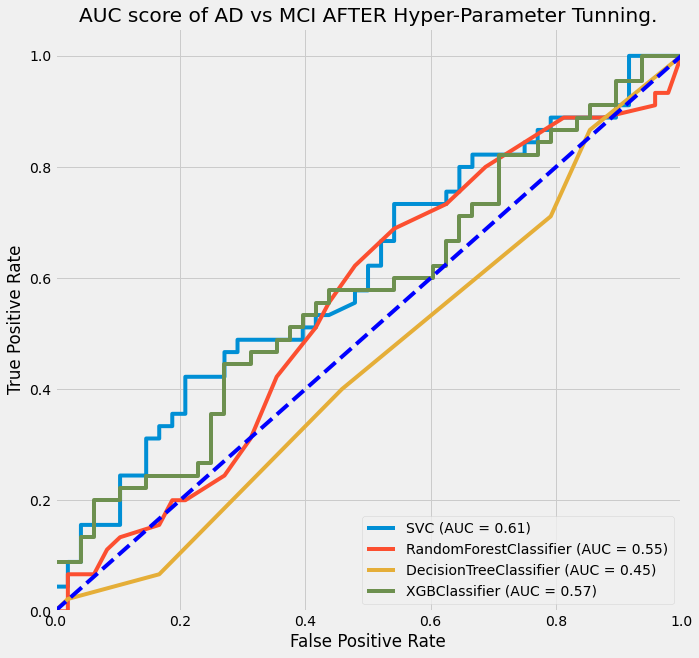

In [67]:
plt.style.use('fivethirtyeight')
# plotting ROC curve for each models.
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in finalClassifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs MCI AFTER Hyper-Parameter Tunning.')



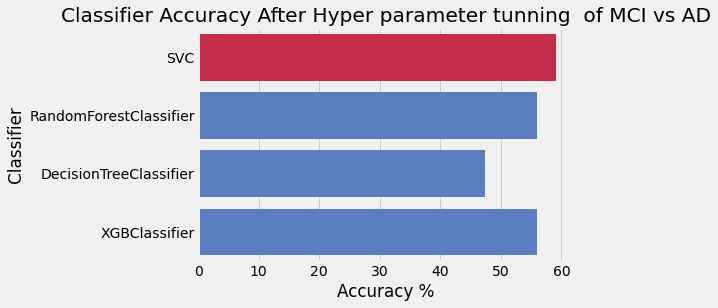

In [68]:


# comparing accuracys core of each models after hypeer parameter tunning .
sns.set_color_codes("muted")
clrs=set_custom_palette(final['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifier', data=final, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy After Hyper parameter tunning  of MCI vs AD')
plt.show()



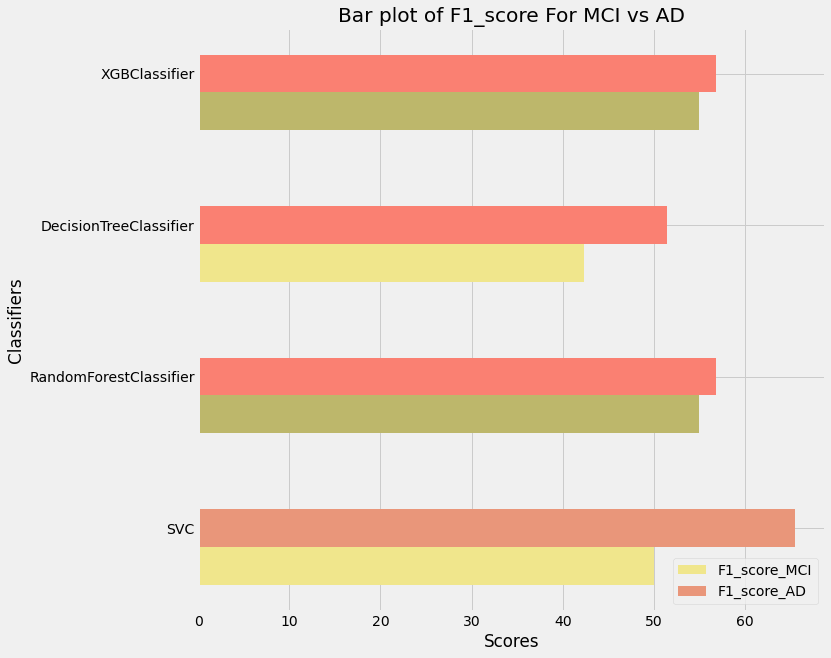

In [69]:

# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted

f1_mci = final["F1_score_NMCI"]
f1_ad = final["F1_score_AD"]

# Using numpy to group 3 different data with bars
X = np.arange(len(f1_nc))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
# changing color to dark khaki if it has highest value for f-score-nc
clrs = ["khaki" if (x < max(f1_mci)) else 'darkkhaki' for x in f1_mci ]
plt.barh(X, f1_mci, color = clrs, height = 0.25)
# changing color to dark salmon if it has highest value for f-score-ad
clrs = ["salmon" if (x < max(f1_ad)) else 'darksalmon' for x in f1_ad]
plt.barh(X + 0.25, f1_ad, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['F1_score_MCI', 'F1_score_AD'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of F1_score For MCI vs AD")
# Namimg the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

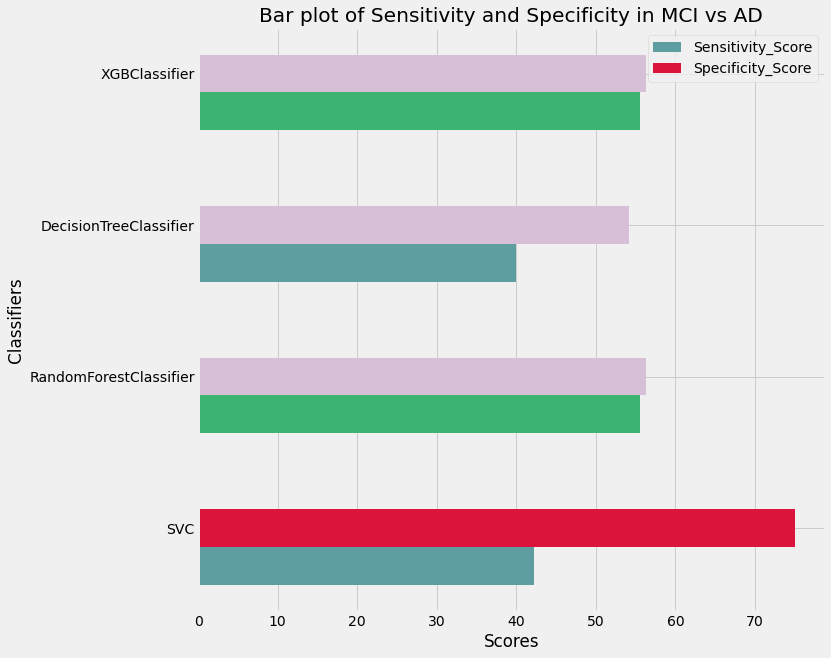

In [70]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = final["Sensitivity_Score"]
speci = final["Specificity Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'crimson' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in MCI vs AD")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()